<a href="https://colab.research.google.com/github/DanieleFoscarin/NNDL_hw3/blob/main/state_from_image_dev.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt


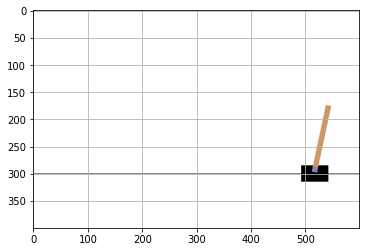

In [4]:
frame = np.load("/content/drive/MyDrive/UNI_ICT/NNDL/NNDL_hw3_data/fame.npy")
plt.imshow(frame)
plt.grid()

[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]
516.5
0


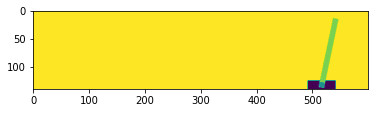

In [55]:
img = frame[160:300]
plt.imshow(img[:,:,0])
# plt.imshow(img[:,0])
print(img[:,:,0])
# print(np.shape(frame))
# print(np.shape(frame)[1])
print(np.mean(np.arange(600)[img[139,:,0]<255]))
print(np.argmax(img[:,1:159,0]))
# print(frame[frame[301,:,0]<255])

In [54]:
def state_from_image(frame):
    #maybe define object once outside
    # detector = cv2.SimpleBlobDetector_create()
    # cart_pos = detector.detect(frame)
    frame = frame[160:300]
    cart_pos = np.mean(np.arange(600)[frame[139,:,0]<255])

    return cart_pos


state = state_from_image(frame)
print(state)

516.5
